<a href="https://colab.research.google.com/github/MassiveTortoise/Colab/blob/main/Hypothesis_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials
from scipy import stats

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id='89ae8c5c4dd54de28f025caa51203110', client_secret='04a458db6134491ab7aa35ab44146a2a')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
def get_album_tracks(album_id):
    tracks = sp.album_tracks(album_id)
    tracks = tracks['items']
    tracks = pd.DataFrame(tracks)
    tracks = tracks[['name', 'id']]
    return tracks

In [ ]:
album_test = get_album_tracks('https://open.spotify.com/intl-es/album/3RQQmkQEvNCY4prGKE6oc5')
album_test.head()

,name,id
0,Moscow Mule,6Xom58OOXk2SoU711L2IXO
1,Después de la Playa,1dm6z1fWB0cErMszU25dy2
2,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx
3,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ
4,Un Ratito,5CzixCxDkRXX9mScCmah8O


In [ ]:
album_list = ['https://open.spotify.com/intl-es/album/3RQQmkQEvNCY4prGKE6oc5', 'https://open.spotify.com/intl-es/album/5lJqux7orBlA1QzyiBGti1', 'https://open.spotify.com/intl-es/album/4FftCsAcXXD1nFO9RFUNFO', 'https://open.spotify.com/intl-es/album/7CjJb2mikwAWA1V6kewFBF', 'https://open.spotify.com/intl-es/album/2d9BCZeAAhiZWPpbX9aPCW', 'https://open.spotify.com/intl-es/album/6ylFfzx32ICw4L1A7YWNLN', 'https://open.spotify.com/intl-es/album/0lgs2Sa82lyX89nBUWyUy6', 'https://open.spotify.com/intl-es/album/156gxGFDxadwiIC3Bfwmj3', 'https://open.spotify.com/intl-es/album/3fonA82Hl7huJiQCwKkzGA', 'https://open.spotify.com/intl-es/album/4kS7bSuU0Jm9LYMosFU2x5']

In [ ]:
all_songs_df = pd.DataFrame()
for i in album_list:
    temporal_df = get_album_tracks(i)
    all_songs_df = pd.concat([all_songs_df, temporal_df])

all_songs_df = all_songs_df.reset_index(drop=True)

In [ ]:
all_songs_df.shape

(164, 2)

In [ ]:
all_songs_df.iloc[62].drop

<bound method Series.drop of name                 EUROPA :(
id      6vh4S1z08AjGipGAEsV62e
Name: 62, dtype: object>

In [ ]:
def get_audio_features(track_id):
    features = sp.audio_features(track_id)[0]
    return {
        'popularity': sp.track(track_id)['popularity'],
        'danceability': features['danceability'],
        'energy': features['energy'],
        'valence': features['valence'],
        'tempo': features['tempo'],
        'acousticness': features['acousticness'],
        'instrumentalness': features['instrumentalness']
    }

In [ ]:
all_songs_df = all_songs_df.drop(62).reset_index(drop=True)

In [ ]:
audio_features = all_songs_df['id'].apply(get_audio_features)

In [ ]:
audio_features_df = pd.DataFrame(audio_features.tolist())
all_songs_df = pd.concat([all_songs_df, audio_features_df], axis=1)
all_songs_df.head()

,name,id,popularity,danceability,energy,valence,tempo,acousticness,instrumentalness
0,Moscow Mule,6Xom58OOXk2SoU711L2IXO,80,0.804,0.674,0.292,99.968,0.2940,0.000001
1,Después de la Playa,1dm6z1fWB0cErMszU25dy2,72,0.564,0.903,0.607,78.293,0.3560,0.000000
2,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,82,0.911,0.712,0.425,92.005,0.0901,0.000027
3,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,80,0.650,0.715,0.187,106.672,0.0993,0.000291
4,Un Ratito,5CzixCxDkRXX9mScCmah8O,73,0.787,0.546,0.222,93.050,0.3050,0.000046


In [ ]:
high_danceability = all_songs_df[all_songs_df['danceability'] > 0.6]['popularity']
low_danceability = all_songs_df[all_songs_df['danceability'] <= 0.6]['popularity']

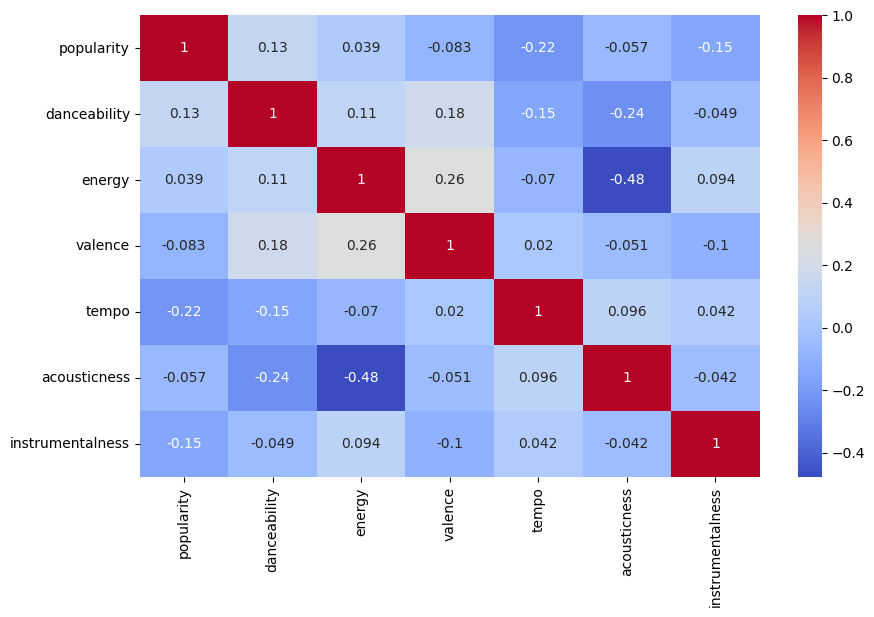

In [ ]:
plt.figure(figsize=(10, 6))
numeric_df = all_songs_df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

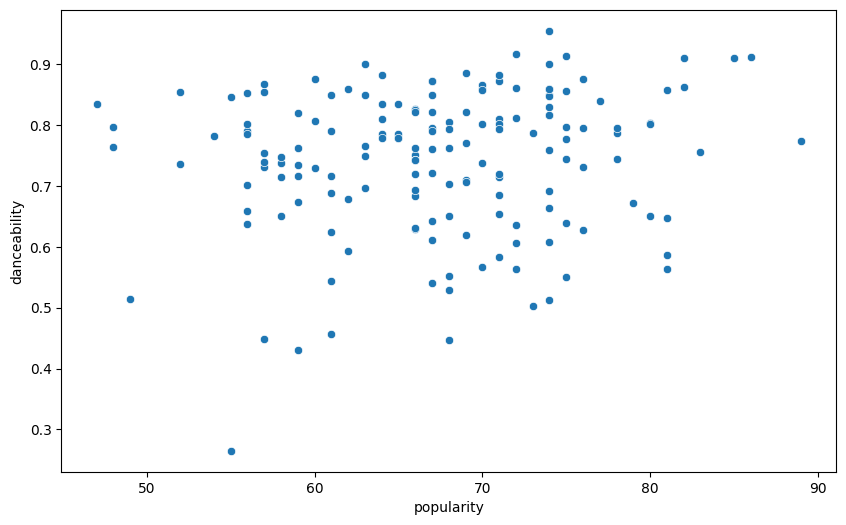

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_songs_df, x='popularity', y='danceability')
plt.show()

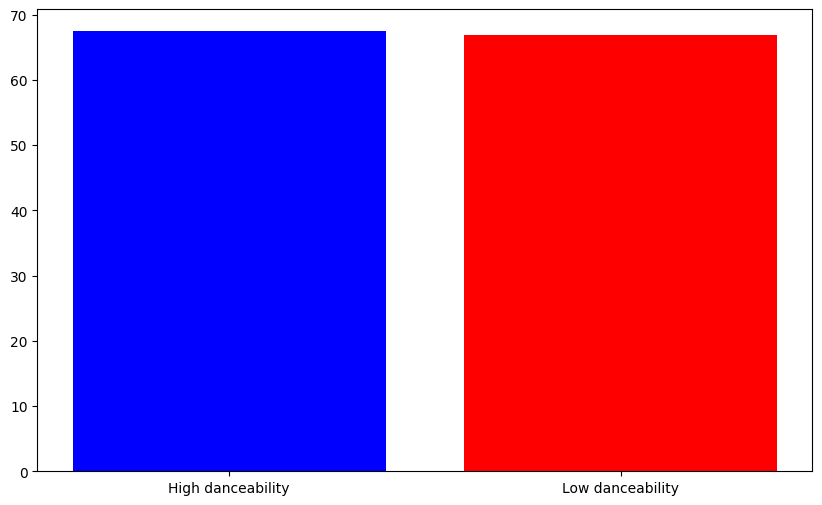

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['High danceability', 'Low danceability'], [high_danceability.mean(), low_danceability.mean()], color=['blue', 'red'])
plt.show()

In [ ]:
t_stat, p_value = stats.ttest_ind(high_danceability, low_danceability)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 0.2660078262381312
P-value: 0.7905735249550145
